In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import itertools
from tqdm.auto import tqdm

In [2]:
import os

os.chdir('/home/hashikami/anaconda3/envs/Diff/content')

In [3]:
image_size = 28
channels = 1
batch_size = 64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(), # ピクセルの値を[0, 1]範囲に正規化
])

trainset = torchvision.datasets.MNIST(
    root='~/datadrive',
    train=True,
    download=False,
    transform=transform
)

trainloader = DataLoader(
    trainset,
    batch_size=batch_size, # ミニバッチのサイズ
    shuffle=True,
    num_workers=2 #データロード時に使用するスレッド数
)

In [4]:
import collections

# クラスのラベルをカウント
labels = [label for _, label in trainset]
class_counts = collections.Counter(labels)

# クラス数と各クラスのサンプル数を出力
num_classes = len(class_counts)
print(f"クラス数: {num_classes}")

for class_label, count in sorted(class_counts.items()):
    print(f"クラス {class_label} のサンプル数: {count}")
    

クラス数: 10
クラス 0 のサンプル数: 5923
クラス 1 のサンプル数: 6742
クラス 2 のサンプル数: 5958
クラス 3 のサンプル数: 6131
クラス 4 のサンプル数: 5842
クラス 5 のサンプル数: 5421
クラス 6 のサンプル数: 5918
クラス 7 のサンプル数: 6265
クラス 8 のサンプル数: 5851
クラス 9 のサンプル数: 5949


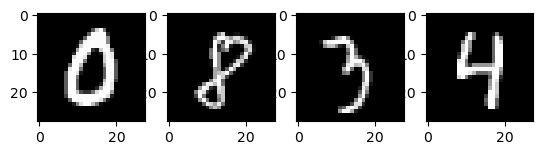

In [5]:
dataiter = iter(trainloader) # イテラブルへ
images, labels = next(dataiter) # 次のイタレーション

fig, axes = plt.subplots(1, 4)
for i in range(4):
  ax = axes[i]
  img = images[i].numpy().squeeze()
  ax.imshow(img, cmap='gray')

plt.show()

# 生成

In [6]:
from diffusion.diffusion_model.models.model4 import DenoiseModel
from diffusion.utils.utils import load_checkpoint


epochs = 500
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
denoise_model = DenoiseModel().to(device)
optimizer = optim.Adam(denoise_model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[int(epochs * ratio) for ratio in [0.5, 0.8]],
    gamma=0.2
)

In [7]:
# checkpointからスタート
denoise_model, optimizer, scheduler, start_epoch, loss = load_checkpoint(denoise_model, optimizer, scheduler, filename='/home/hashikami/checkpoint/checkpoint7.pth')

sampling loop time step:   0%|          | 0/100 [00:00<?, ?it/s]

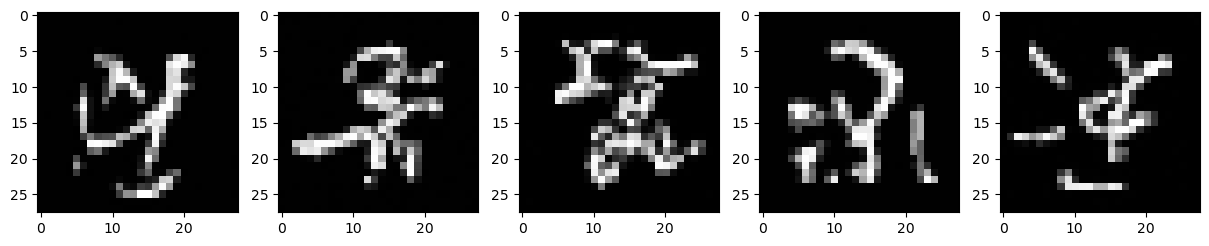

In [8]:
from diffusion.utils.sample import ddpm_plot_samples

ddpm_plot_samples(denoise_model, batch_size=5, timesteps=100)

sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

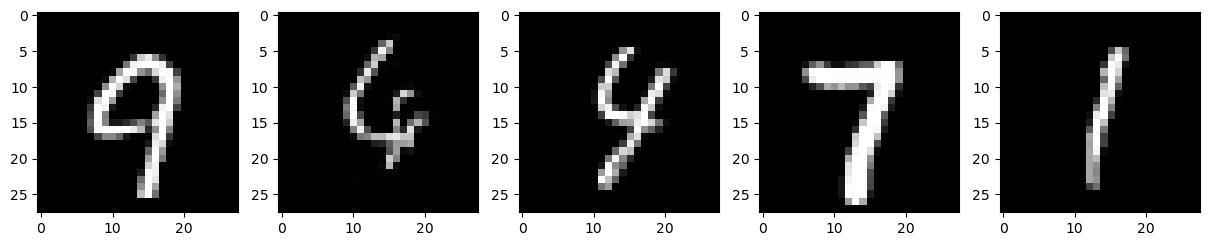

In [11]:
import importlib
from diffusion.utils import sample

importlib.reload(sample)

from diffusion.utils.sample import ddim_plot_samples


ddim_plot_samples(denoise_model, eta=0.0, interval=10, batch_size=5, timesteps=500)

# 画像の再構成

sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

平均二乗誤差: 0.0005628829821944237


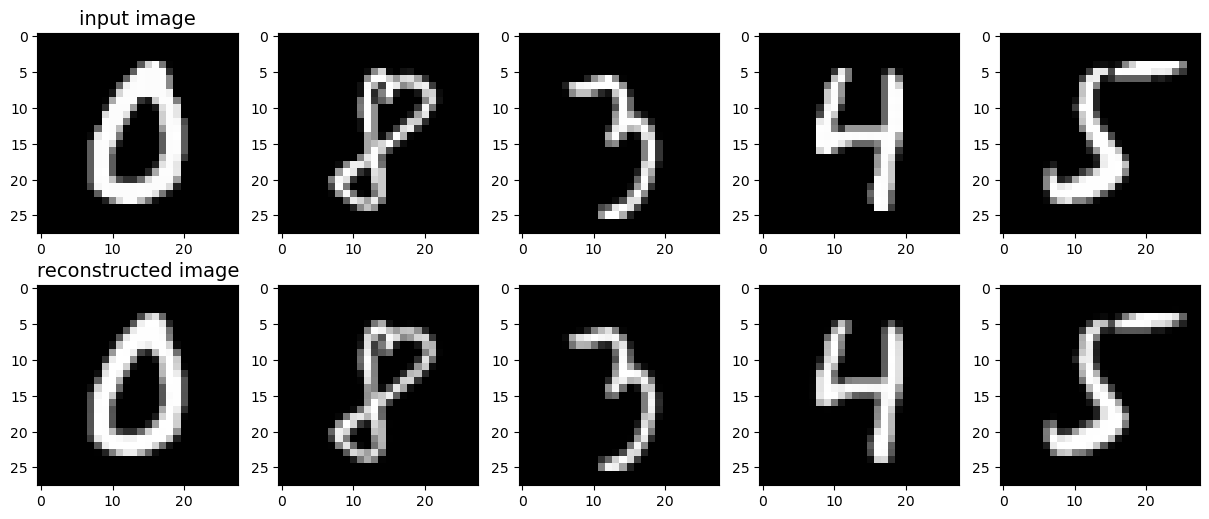

In [12]:
import importlib
from diffusion.utils import sample

importlib.reload(sample)

from diffusion.utils.sample import ddim_plot_samples

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_img = images[:5].to(device)
ddim_plot_samples(denoise_model, eta=0.0, interval=10, batch_size=5, timesteps=500, reverse=True, input_img=input_img)